# Neural Networks Assignment 1
This is a submission by 18MCMT28

Name: K. Sai Somanath

## Import necessary packages
matplotlib for plotting and numpy for managing the huge arrays

In [361]:
import matplotlib.pyplot as plt
import numpy as np

In [362]:
%matplotlib notebook

## Creating the datasets

In [363]:
dataset1_x = np.array([1, 7, 8, 9, 4, 8], dtype=np.float128)
dataset1_y = np.array([6, 2, 9, 9, 8, 5], dtype=np.float128)
dataset2_x = np.array([2, 3, 2, 7, 1, 5], dtype=np.float128)
dataset2_y = np.array([1, 3, 4, 1, 3, 2], dtype=np.float128)

# Create Set A for all points with output one
set_A = np.column_stack((dataset1_x, dataset1_y))
set_A_outputs = np.ones(len(set_A))

# Create Set B similarly with output zero
set_B = np.column_stack((dataset2_x, dataset2_y))
set_B_outputs = np.zeros(len(set_B))

# Mash everything together
data = np.concatenate((set_A, set_B))
desired = np.concatenate((set_A_outputs, set_B_outputs))

# Input for Widrow Hoff
desired_linear = np.copy(desired)
for index, a in enumerate(desired):
    if a == 0:
        desired_linear[index] = -1

### Plotting the dataset

<IPython.core.display.Javascript object>


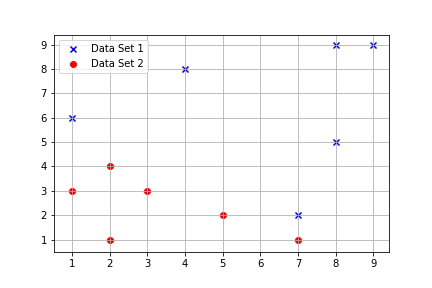

In [364]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')
plt.legend(loc='upper left')

## Implementation of the Perceptron

In [365]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [366]:
class Perceptron():
    """Implements a single general perceptron"""
    def __init__(self, input_dimensions,  Weights=np.array([]), w_=False, learning_rate=1, epochs=500, fn='binary'):
        if not w_:
            self.Weights = np.zeros(input_dimensions + 1, dtype=np.float128) # An extra one for bias
        else:
            self.Weights = Weights
        self.epochs = epochs
        self.eta = learning_rate
        self.fn = fn
        
    # The activation function
    def activation_fn(self, y):
        if self.fn == 'binary':
            return 1 if y >= 0 else 0
        elif self.fn == 'linear':
            return y
        else: # fn == 'sigmoid'
            return sigmoid(y)
    
    def find_output(self, input_matrix):
        z = self.Weights.T.dot(input_matrix)
        return self.activation_fn(z)
    
    def learn(self, input_vector, desired_output):
        errors = []
        for _ in range(self.epochs):
            total_error = 0
            for i in range(desired_output.shape[0]):
                # Insert the weight 1 for every input for the bais
                x = np.insert(input_vector[i], 0, 1)
                actual_output = self.find_output(x)
                error = desired_output[i] - actual_output
                # Weight update rules
                if self.fn == 'binary':
                    self.Weights = self.Weights + self.eta * error * x
                    if error <= 0:
                        total_error += int(error != 0.0)
                elif self.fn == 'linear':
                    self.Weights = self.Weights + self.eta * error * x
                    total_error += (error ** 2) / 2
                else:
                    self.Weights = self.Weights + self.eta * error * x * actual_output * (1 - actual_output)
                    total_error += (error ** 2) / 2
            errors.append(total_error)
        return errors
    
    def predict(self, X):
        if self.fn == 'binary':
            return 1 if self.find_output(X) > 0.0 else 0
        elif self.fn == 'linear':
            return 1 if self.find_output(X) >= 0.0 else -1
        else:
            return 1 if self.find_output(X) >= 0.5 else 0

## Question B
In each case, show the weight vector learned

In [367]:
# Binary threshlod perceptron
perceptron_binary = Perceptron(input_dimensions=2)
perceptron_binary.learn(data, desired)
print(perceptron_binary.Weights)

# Linear perceptron
linear_perceptron = Perceptron(input_dimensions=2, fn='linear', epochs=4000, learning_rate=0.0001)
linear_perceptron.learn(data, desired_linear)
print(linear_perceptron.Weights)

# Sigmooid Perceptron
sigmoid_perceptron = Perceptron(input_dimensions=2, fn='sigmoid', epochs=6000, learning_rate=0.05)
sigmoid_perceptron.learn(data, desired)
print(sigmoid_perceptron.Weights)

[-18.   2.   3.]
[-0.90642431  0.04759966  0.17821521]
[-12.89433122   1.32953172   2.20958104]


## Perceptron with Threshold activation function

<IPython.core.display.Javascript object>


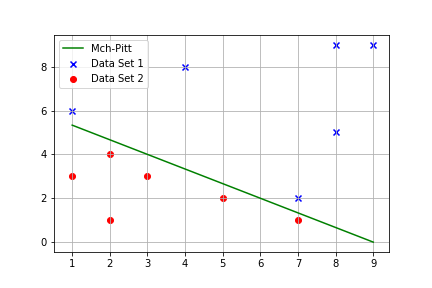

In [368]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')

# Sample points
i = np.linspace(np.amin(data, axis=0)[0], np.amax(data, axis=0)[0], 2000)

# To plot the boundary learned by the perceptron algorithm
weights = perceptron_binary.Weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
y1 = (slope * i) + intercept
ax.plot(i, y1, color='green', label='Mch-Pitt')
plt.legend()


## Perceptron with Widrow Hoff learning or Least mean squared rule

<IPython.core.display.Javascript object>


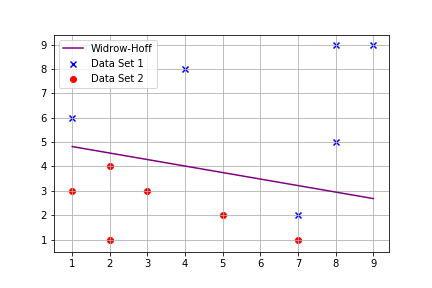

In [369]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')

# Sample points
i = np.linspace(np.amin(data, axis=0)[0], np.amax(data, axis=0)[0], 2000)

# To plot the boundary learned by the perceptron algorithm
weights = linear_perceptron.Weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
y1 = (slope * i) + intercept
plt.plot(i, y1, color='purple', label='Widrow-Hoff')
plt.legend()


## Perceptron with Sigmoid activation function

<IPython.core.display.Javascript object>


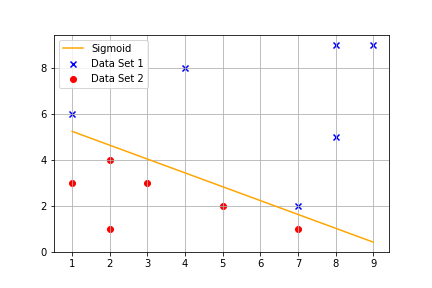

In [370]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')

# Sample points
i = np.linspace(np.amin(data, axis=0)[0], np.amax(data, axis=0)[0], 2000)

# To plot the boundary learned by the perceptron algorithm
weights = sigmoid_perceptron.Weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
y1 = (slope * i) + intercept
plt.plot(i, y1, color='orange', label='Sigmoid')
plt.legend()

## Boundaries learnt by all the three perceptrons


<IPython.core.display.Javascript object>


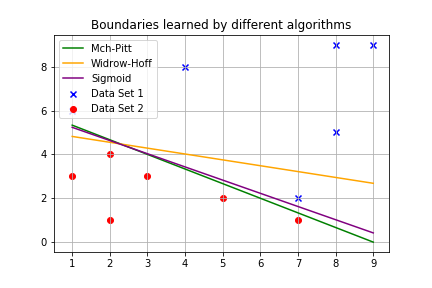

Text(0.5,1,'Boundaries learned by different algorithms')

In [371]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')

# Sample points
i = np.linspace(np.amin(data, axis=0)[0], np.amax(data, axis=0)[0], 2000)

# To plot the boundary learned by the perceptron algorithm
weights = perceptron_binary.Weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
y1 = (slope * i) + intercept
ax.plot(i, y1, color='green', label='Mch-Pitt')

# To plot boundary learned by using the Widrow-Hoff learning rule
weights = linear_perceptron.Weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
y2 = (slope * i) + intercept
ax.plot(i, y2, color='orange', label='Widrow-Hoff')
    
# To plot the boundary of the sigmoid perceptron
weights = sigmoid_perceptron.Weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
y3 = (slope * i) + intercept
ax.plot(i, y3, color='purple', label='Sigmoid')

plt.legend()
plt.title('Boundaries learned by different algorithms')

# Question C
Create a test set and show the accuracy of the perceptrons

The following additions are made to the data set

Data Set 1 = (6,5); (8,8); (8, 4)

Data Set 2 = (1,1); (4,2); (8, -1)

In [372]:
# Make the data set
test_a = np.array([[6, 5], [8, 8], [8, 4]])
test_b = np.array([[1, 1], [4, 2], [8, -1]])
test_set = np.concatenate((test_a, test_b))
test_labels = [1, 1, 1, 0, 0, 0]
test_linear = [1, 1, 1, -1, -1, -1]

### For Binary threshold perceptron

In [373]:
correct = 0
for index, arr in enumerate(test_set):
    if perceptron_binary.predict(np.insert(arr, 0, 1)) == test_labels[index]:
        correct += 1
accuracy = correct / len(test_set)
error = 1 - accuracy
print("Accuracy = " + str(accuracy * 100) + "%\nError = " + str(error * 100) + '%')

Accuracy = 100.0%
Error = 0.0%


### For Widrow-Hoff perceptron

In [374]:
correct = 0
for index, arr in enumerate(test_set):
    if linear_perceptron.predict(np.insert(arr, 0, 1)) == test_linear[index]:
        correct += 1
accuracy = correct / len(test_set)
error = 1 - accuracy
print("Accuracy = " + str(accuracy * 100) + "%\nError = " + str(error * 100) + '%')

Accuracy = 100.0%
Error = 0.0%


### For Sigmoid Perceptron

In [375]:
correct = 0
for index, arr in enumerate(test_set):
    if sigmoid_perceptron.predict(np.insert(arr, 0, 1)) == test_labels[index]:
        correct += 1
accuracy = correct / len(test_set)
error = 1 - accuracy
print("Accuracy = " + str(accuracy * 100) + "%\nError = " + str(error * 100) + '%')

Accuracy = 100.0%
Error = 0.0%


## Comparison table

|Perceptron|Accuracy|
|:---:|:---:|
|Binary|100%|
|Widrow-Hoff|100%|
|Sigmoid|100%|

## Question D
Comment on the convergence time of the algorithms

We shall initialise the weight vectors and and run the algorithm until they acheive results similar to that we have attained above for each of the algorithms respectively

We consider the following initialization
1.  $x_{0} = 1, x_{1} = 1, x_{2} = 1$
2.  $x_{0} = -1, x_{1} = -1, x_{2} = -1$
3.  $x_{0} = -10, x_{1} = 5, x_{2} = 10$
4.  $x_{0} = -20, x_{1} = -20, x_{2} = -20$
5.  $x_{0} = 0.011, x_{1} = 1.23, x_{2} = 2.34$

Here, $x_{0}$ is the bais term

In [388]:
w1 = np.array([1, 1, 1])
w2 = np.array([-1, -1, -1])
w3 = np.array([-10, 5, 10])
w4 = np.array([-20, -20, 20])
w5 = np.array([0.011, 1.23, 2.34])

def get_accuracy(X, y):
    correct = 0
    for index, arr in enumerate(X):
        if sigmoid_perceptron.predict(np.insert(arr, 0, 1)) == y[index]:
            correct += 1
    accuracy = correct / len(X)
    error = 1 - accuracy
    print("Accuracy = " + str(accuracy * 100) + "%\nError = " + str(error * 100) + '%')
    

    


We define an instance of a perceprtron for each weight, for each type of learnig algorithm

In [389]:
# Binary threshlod perceptrons
p1 = Perceptron(input_dimensions=2, Weights=w1, w_=True)
p1_errors = p1.learn(data, desired)
p2 = Perceptron(input_dimensions=2, Weights=w2, w_=True)
p2_errors = p2.learn(data, desired)
p3 = Perceptron(input_dimensions=2, Weights=w3, w_=True)
p3_errors = p3.learn(data, desired)
p4 = Perceptron(input_dimensions=2, Weights=w4, w_=True)
p4_errors = p4.learn(data, desired)
p5 = Perceptron(input_dimensions=2, Weights=w5, w_=True)
p5_errors = p5.learn(data, desired)

# Linear perceptrons
l1 = Perceptron(input_dimensions=2, fn='linear', epochs=4000, learning_rate=0.0001, Weights=w1, w_=True)
l1_errors = l1.learn(data, desired_linear)
l2 = Perceptron(input_dimensions=2, fn='linear', epochs=4000, learning_rate=0.0001, Weights=w2, w_=True)
l2_errors = l2.learn(data, desired_linear)
l3 = Perceptron(input_dimensions=2, fn='linear', epochs=4000, learning_rate=0.0001, Weights=w3, w_=True)
l3_errors = l3.learn(data, desired_linear)
l4 = Perceptron(input_dimensions=2, fn='linear', epochs=4000, learning_rate=0.0001, Weights=w4, w_=True)
l4_errors = l4.learn(data, desired_linear)
l5 = Perceptron(input_dimensions=2, fn='linear', epochs=4000, learning_rate=0.0001, Weights=w5, w_=True)
l5_errors = l5.learn(data, desired_linear)

# Sigmoid Perceptrons
s1 = Perceptron(input_dimensions=2, fn='sigmoid', epochs=6000, learning_rate=0.05, Weights=w1, w_=True)
s1_errors = s1.learn(data, desired)
s2 = Perceptron(input_dimensions=2, fn='sigmoid', epochs=6000, learning_rate=0.05, Weights=w2, w_=True)
s2_errors = s2.learn(data, desired)
s3 = Perceptron(input_dimensions=2, fn='sigmoid', epochs=6000, learning_rate=0.05, Weights=w3, w_=True)
s3_errors = s3.learn(data, desired)
s4 = Perceptron(input_dimensions=2, fn='sigmoid', epochs=6000, learning_rate=0.05, Weights=w4, w_=True)
s4_errors = s4.learn(data, desired)
s5 = Perceptron(input_dimensions=2, fn='sigmoid', epochs=6000, learning_rate=0.05, Weights=w5, w_=True)
s5_errors = s5.learn(data, desired)

array([-10.01420659,   4.97158682,   9.9857934 ], dtype=float128)

In [395]:
btu = ['BTU', p1_errors.index(min(p1_errors))+1, p2_errors.index(min(p2_errors))+1, p3_errors.index(min(p3_errors))+1,
      p4_errors.index(min(p4_errors))+1, p5_errors.index(min(p5_errors))+1]
wid = ['Widrow-Hoff', l1_errors.index(min(l1_errors))+1, l2_errors.index(min(l2_errors))+1, l3_errors.index(min(l3_errors))+1,
      l4_errors.index(min(l4_errors))+1, l5_errors.index(min(l5_errors))+1]
sig = ['Sigmoid', s1_errors.index(min(s1_errors))+1, s2_errors.index(min(s2_errors))+1, s3_errors.index(min(s3_errors))+1,
      s4_errors.index(min(s4_errors))+1, s5_errors.index(min(s5_errors))+1]
titles = ['Perceptron', 'Weights1', 'Weights2', 'Weights3', 'Weights4', 'Weights5']
d = []
d.append(titles)
d.append(btu)
d.append(wid)
d.append(sig)
for i in range(4):
    line = '|'.join(str(x).ljust(12) for x in d[i])
    print(line)
    if i == 0:
        print('-' * len(line))

Perceptron  |Weights1    |Weights2    |Weights3    |Weights4    |Weights5    
-----------------------------------------------------------------------------
BTU         |38          |34          |11          |12          |31          
Widrow-Hoff |4000        |4000        |4000        |4000        |4000        
Sigmoid     |6000        |6000        |6000        |6000        |6000        


### Analysis
Each element in the above table gives the number of epochs that the algorithm took to **find the best solution**, for each set of weights that we have defined eairlier. 

#### Stopping condition
The alorithm is run for the number of epochs given for each instance of the weights. We choose the same learning rate and epochs to facilitate a fair comaparison of the convergence time

#### Some intresting observations
1. For the choosen weights, both Widrow-Hoff and Sigmoid perceptrons do not converge before the stoppping condition
2. The Perceptron learning algorithm converges after a set number of epochs as it is gaurenteed to...

The convergence speed is faster if, the _slope and intercept_ for the intial weights choosen, is **closer** to the *slope and intercept* of $w^{*}$, the solution vector

## Question F
Make the dataset linearly non-sepatable and find the solution vector for Widrow-Hoff and Sigmoid perceptrons

We choose some points from set A(+) and exchange it with the set B(-) as follows...

1. (1, 6) <--> (2, 1)
2. (9, 9) <--> (2, 4)
3. (7, 2) <--> (3, 3)

In [396]:
dataset1_x_ = np.array([2, 3, 8, 2, 4, 8], dtype=np.float128)
dataset1_y_ = np.array([1, 3, 9, 4, 8, 5], dtype=np.float128)
dataset2_x_ = np.array([1, 7, 9, 7, 1, 5], dtype=np.float128)
dataset2_y_ = np.array([6, 2, 9, 1, 3, 2], dtype=np.float128)

# Create Set A for all points with output one
set_A_ = np.column_stack((dataset1_x_, dataset1_y_))
set_A_outputs_ = np.ones(len(set_A_))

# Create Set B similarly with output zero
set_B_ = np.column_stack((dataset2_x_, dataset2_y_))
set_B_outputs_ = np.zeros(len(set_B_))

# Mash everything together
data_ = np.concatenate((set_A_, set_B_))
desired_ = np.concatenate((set_A_outputs_, set_B_outputs_))

# Input for Widrow Hoff
desired_linear_ = np.copy(desired_)
for index, a in enumerate(desired):
    if a == 0:
        desired_linear_[index] = -1

### Plotting the new dataset

<IPython.core.display.Javascript object>


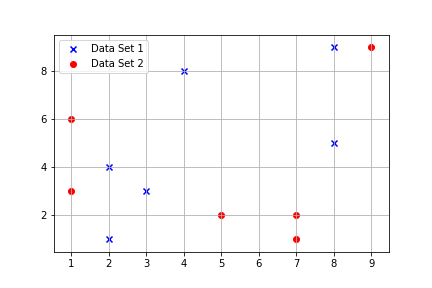

In [398]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax.scatter(x=dataset1_x_, y=dataset1_y_, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x_, y=dataset2_y_, color='red', marker='o', label='Data Set 2')
plt.legend(loc='upper left')

## An attempt to learn the decision boundary by the perceptrons

In [399]:
# Linear perceptron
linear_perceptron_ = Perceptron(input_dimensions=2, fn='linear', epochs=4000, learning_rate=0.0001)
linear_perceptron_.learn(data_, desired_linear_)
print(linear_perceptron.Weights)

# Sigmooid Perceptron
sigmoid_perceptron_ = Perceptron(input_dimensions=2, fn='sigmoid', epochs=6000, learning_rate=0.05)
sigmoid_perceptron_.learn(data_, desired_)
print(sigmoid_perceptron.Weights)

[-0.90642431  0.04759966  0.17821521]
[-12.89433122   1.32953172   2.20958104]


<IPython.core.display.Javascript object>


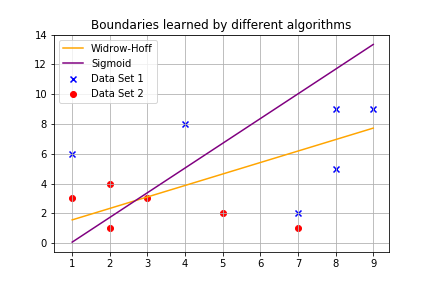

Text(0.5,1,'Boundaries learned by different algorithms')

In [400]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.grid(True)
ax.scatter(x=dataset1_x, y=dataset1_y, color='blue', marker='x', label='Data Set 1')
ax.scatter(x=dataset2_x, y=dataset2_y, color='red', marker='o', label='Data Set 2')

# Sample points
i = np.linspace(np.amin(data, axis=0)[0], np.amax(data, axis=0)[0], 2000)

# To plot boundary learned by using the Widrow-Hoff learning rule
weights = linear_perceptron_.Weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
y2 = (slope * i) + intercept
ax.plot(i, y2, color='orange', label='Widrow-Hoff')
    
# To plot the boundary of the sigmoid perceptron
weights = sigmoid_perceptron_.Weights
slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
intercept = -weights[0]/weights[2]
y3 = (slope * i) + intercept
ax.plot(i, y3, color='purple', label='Sigmoid')

plt.legend()
plt.title('Boundaries learned by different algorithms')

The solutions found in both the cases is not correct as a single layer perceptron cannot learn a linearly non-seperable dataset, **even if the function used is non-linear as in the case of Sigmoid**. 

*Both the algorithms fail to find a viable soultion.*